In [194]:
#Importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, Normalizer
import seaborn as sns
import scipy.stats
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import silhouette_score
from sklearn_pandas import DataFrameMapper
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.decomposition import PCA

In [197]:
#load dataset
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Data Analyst/dataset

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Data Analyst/dataset


In [198]:
df = pd.read_csv('online_shoppers_intention.csv',encoding ='latin')

# Data Cleansing

In [199]:
#View data
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.shape

(12330, 18)

In [ ]:
#check data summary
def summary(df):
    
    columns = df.columns.to_list()
    
    dtypes = []
    unique_counts = []
    missing_counts = []
    missing_percentages = []
    total_counts = [df.shape[0]] * len(columns)

    for col in columns:
        dtype = str(df[col].dtype)
        dtypes.append(dtype)
        unique_count = df[col].nunique()
        unique_counts.append(unique_count)
        missing_count = df[col].isnull().sum()
        missing_counts.append(missing_count)
        missing_percentage = round((missing_count/df.shape[0]) * 100, 2)
        missing_percentages.append(missing_percentage)

    df_summary = pd.DataFrame({
        "column": columns,
        "dtypes": dtypes,
        "unique_count": unique_counts,
        "missing_values": missing_counts,
        "missing_percentage": missing_percentages,
        "total_count": total_counts,
    })

    return df_summary.sort_values(by="missing_percentage", ascending=False).reset_index(drop=True)

summary(df)

,column,dtypes,unique_count,missing_values,missing_percentage,total_count
0,Administrative,int64,27,0,0.0,12330
1,Administrative_Duration,float64,3335,0,0.0,12330
2,Weekend,bool,2,0,0.0,12330
3,VisitorType,object,3,0,0.0,12330
4,TrafficType,int64,20,0,0.0,12330
5,Region,int64,9,0,0.0,12330
6,Browser,int64,13,0,0.0,12330
7,OperatingSystems,int64,8,0,0.0,12330
8,Month,object,10,0,0.0,12330
9,SpecialDay,float64,6,0,0.0,12330


## Drop Column

In [200]:
#drop unrelated variables
df = df.drop(columns=['SpecialDay', 'OperatingSystems','Browser', 'Region', 'TrafficType', 'VisitorType','Weekend', 'Month'])

## Data Outliers

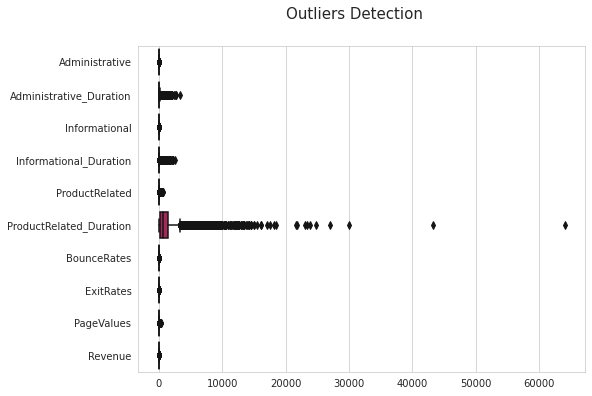

In [ ]:
#check outliers
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
ax = sns.boxplot(data=df, orient="h", palette="rocket_r")

title_string = "Outliers Detection"

plt.suptitle(title_string, y = 0.97, fontsize = 15)
plt.show()

**Outlier Handling for Product Related Duration**

In [201]:
#handling ouliers with IQR Method
Q1= df['ProductRelated_Duration'].quantile(0.25)
Q3= df['ProductRelated_Duration'].quantile(0.75)
IQR=Q3-Q1

In [202]:
df['ProductRelated_Duration_Outlier']= False

In [203]:
for index, row in df.iterrows():
    if row['ProductRelated_Duration']>(Q1+1.5 * IQR):
        df.at[index,'ProductRelated_Duration_Outlier']= True

In [204]:
#Sum of oulier in dataset for Productrelated Duration variable
df['ProductRelated_Duration_Outlier'].sum()

1972

In [205]:
non_outliers=df.loc[df['ProductRelated_Duration_Outlier']==False]

**Outlier Handling for Administrative Duration**

In [206]:
Q1= non_outliers['Administrative_Duration'].quantile(0.25)
Q3= non_outliers['Administrative_Duration'].quantile(0.75)
IQR=Q3-Q1

In [207]:
non_outliers['Administrative_Duration_Outlier']= False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [208]:
for index, row in non_outliers.iterrows():
    if row['Administrative_Duration']>(Q1+1.5 * IQR):
        non_outliers.at[index,'Administrative_Duration_Outlier']= True

In [209]:
non_outliers['Administrative_Duration_Outlier'].sum()

1842

In [210]:
non_outliers2=non_outliers.loc[non_outliers['Administrative_Duration_Outlier']==False]

**Outlier Handling for Informational Duration**

In [211]:
Q1= non_outliers2['Informational_Duration'].quantile(0.25)
Q3= non_outliers2['Informational_Duration'].quantile(0.75)
IQR=Q3-Q1

In [212]:
non_outliers2['Informational_Duration_Outlier']= False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [213]:
for index, row in non_outliers2.iterrows():
    if row['Informational_Duration']>(Q1+1.5 * IQR):
        non_outliers2.at[index,'Informational_Duration_Outlier']= True

In [214]:
non_outliers2['Informational_Duration_Outlier'].sum()

895

In [215]:
non_outliers3=non_outliers2.loc[non_outliers2['Informational_Duration_Outlier']==False]

In [216]:
#delete outliers detection column
non_outliers3 = non_outliers3.drop(columns=['ProductRelated_Duration_Outlier','Administrative_Duration_Outlier','Informational_Duration_Outlier'])


## Handling Data Imbalance

In [217]:
X = non_outliers3.drop('Revenue',axis='columns')
y = non_outliers3['Revenue']

In [218]:
over = RandomOverSampler(sampling_strategy=1)                    
X, y = over.fit_resample(X, y)

# PCA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



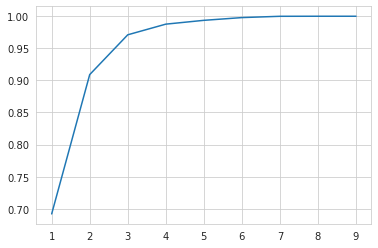

In [219]:
#Scaling/transforming data
norm = Normalizer()
X_norm = norm.fit_transform(X)

pca = PCA(n_components=9)
pca.fit(X_norm)
sns.lineplot(range(1,10),pca.explained_variance_ratio_.cumsum())

In [ ]:
#calculate how much data can be explained after PCA
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance: [1.24138152e-01 3.23523194e-02 9.13195939e-03 3.11933850e-03
 9.42109080e-04 7.45280070e-04 6.83634969e-04 3.03122334e-06
 6.96943768e-35]
Explained variance ratio: [7.25462723e-01 1.89066788e-01 5.33671236e-02 1.82293981e-02
 5.50568061e-03 4.35541289e-03 3.99515924e-03 1.77144536e-05
 4.07293579e-34]


In [220]:
pca = PCA(n_components=2)
X_new = pd.DataFrame(pca.fit_transform(X_norm))
X_new

,0,1
0,1.268257,-0.239640
1,-0.110726,-0.053809
2,1.268257,-0.239640
3,0.397506,-0.231955
4,-0.120557,-0.048081
...,...,...
13513,-0.114950,-0.044871
13514,-0.113272,-0.045272
13515,-0.101664,-0.053495
13516,-0.115032,-0.049514


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



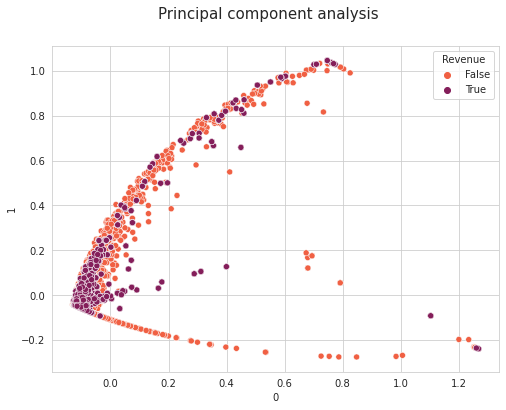

In [221]:
#Visualizing PCA
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.scatterplot(X_new[0],X_new[1], hue = y, palette="rocket_r")

title_string = "Principal component analysis"

plt.suptitle(title_string, y = 0.97, fontsize = 15)
plt.show()

<BarContainer object of 2 artists>

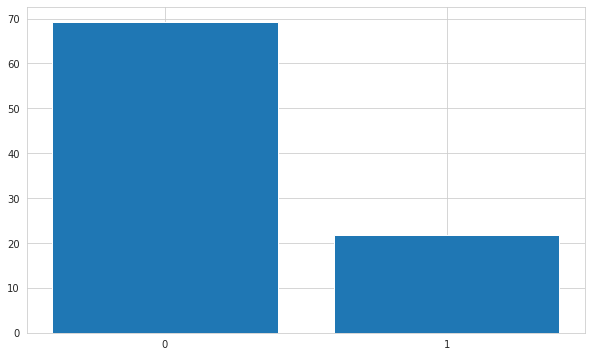

In [224]:
#visualizing PCA data variance
fig, ax = plt.subplots(figsize=(10,6))
plt.bar(['0', '1'], pca.explained_variance_ratio_ * 100)

# K-means

## Elbow Method

<Figure size 432x288 with 0 Axes>

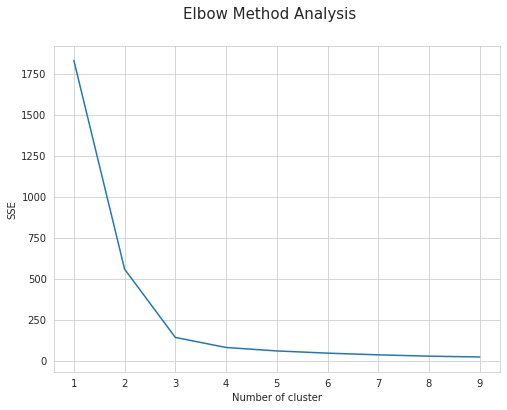

In [225]:
#Elbow Method
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_new)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.figure(figsize=(8,6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
title_string = "Elbow Method Analysis"
plt.suptitle(title_string, y = 0.97, fontsize = 15)
plt.show()

## Silhouette Method

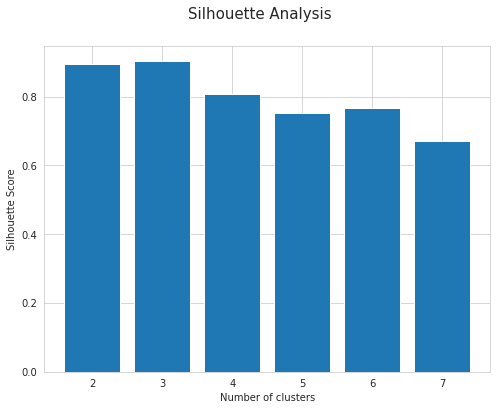

In [ ]:
#silhouette analysis
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_new, KMeans(n_clusters = n_cluster).fit_predict(X_new))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.figure(figsize=(8,6))
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
title_string = "Silhouette Analysis"
plt.suptitle(title_string, y = 0.97, fontsize = 15)
plt.show() 

In [226]:
kmeans = KMeans(n_clusters=3)
kmeans

KMeans(n_clusters=3)

In [227]:
y_predicted = kmeans.fit_predict(X_new[[0,1]])
y_predicted

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [233]:
#add cluster in dataset
X['cluster'] = y_predicted
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,cluster
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
13513,0,0.0,0,0.0,12,554.500000,0.000000,0.018182,49.625455,0
13514,2,14.2,0,0.0,53,2016.566667,0.003636,0.036364,8.154361,0
13515,0,0.0,0,0.0,34,783.566667,0.000000,0.005882,62.078824,0
13516,0,0.0,0,0.0,32,1297.750000,0.000000,0.007500,42.622745,0


## Clustering Output

In [232]:
#cluster analysis in pivot table 
table = pd.pivot_table(X, values=['ProductRelated','ProductRelated_Duration','Administrative','Administrative_Duration','Informational','Informational_Duration',
                                  'BounceRates','ExitRates','PageValues'],
                       index=['cluster'],
                       aggfunc={'ProductRelated':np.median,
                                'ProductRelated_Duration':np.median,
                                'Administrative':np.median,
                                'Administrative_Duration':np.median,
                                'Informational':np.median,
                                'Informational_Duration':np.median,
                                'BounceRates':np.median,
                                'ExitRates':np.median,
                                'PageValues':np.median,})
table

,Administrative,Administrative_Duration,BounceRates,ExitRates,Informational,Informational_Duration,PageValues,ProductRelated,ProductRelated_Duration
cluster,,,,,,,,,
0,0,0.0,0.0,0.022222,0,0.0,0.0,16,539.075
1,0,0.0,0.2,0.200000,0,0.0,0.0,1,0.000
2,3,55.5,0.0,0.037037,0,0.0,0.0,3,27.200


Text(0.5, 0.95, 'K-means Clustering')

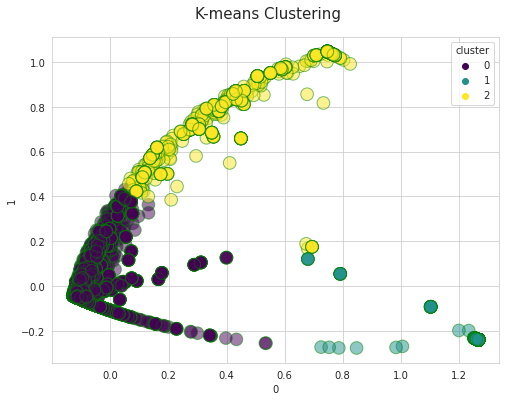

In [230]:
#add cluster in dataset
X_new['cluster'] = y_predicted

#Visualizing k-means output
fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(
    x=0, y=1,
    hue="cluster",
    edgecolor='green',
    data=X_new,
    palette='viridis',
    s=160,
    alpha=0.5,
    ax=ax
)
title_string = "K-means Clustering"
plt.suptitle(title_string, y = 0.95, fontsize = 15) 

## Radar Chart per Cluster

Text(0.5, 1.08, 'Cluster 0')

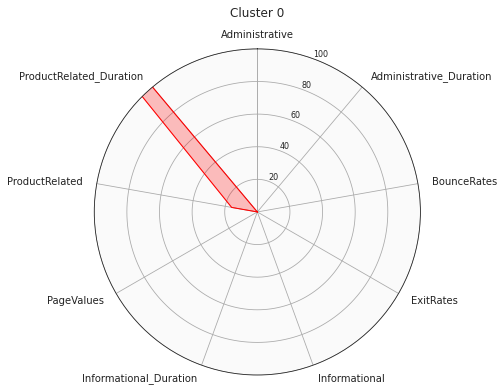

In [234]:
# Each attribute we'll plot in the radar chart.
labels = ['Administrative', 'Administrative_Duration',	'BounceRates',	'ExitRates',
              'Informational','Informational_Duration','PageValues','ProductRelated','ProductRelated_Duration']

# Let's look at the 1970 Chevy Impala and plot it.
values = table.loc[0].tolist()

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
values += values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw the outline of our data.
ax.plot(angles, values, color='red', linewidth=1)
# Fill it in.
ax.fill(angles, values, color='red', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 100)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Lastly, give the chart a title and give it some
# padding above the "Acceleration" label.
ax.set_title('Cluster 0', y=1.08)

Text(0.5, 1.08, 'Cluster 1')

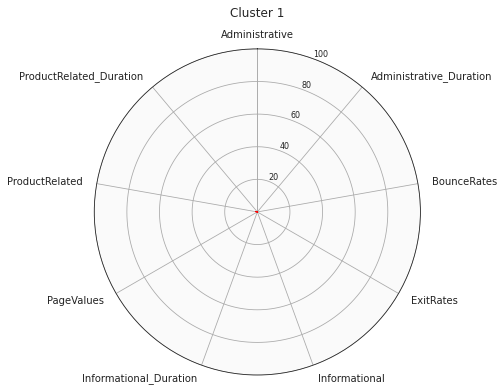

In [235]:
# Each attribute we'll plot in the radar chart.
labels = ['Administrative', 'Administrative_Duration',	'BounceRates',	'ExitRates',
              'Informational','Informational_Duration','PageValues','ProductRelated','ProductRelated_Duration']

# Let's look at the 1970 Chevy Impala and plot it.
values = table.loc[1].tolist()

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
values += values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw the outline of our data.
ax.plot(angles, values, color='red', linewidth=1)
# Fill it in.
ax.fill(angles, values, color='red', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 100)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Lastly, give the chart a title and give it some
# padding above the "Acceleration" label.
ax.set_title('Cluster 1', y=1.08)

Text(0.5, 1.08, 'Cluster 2')

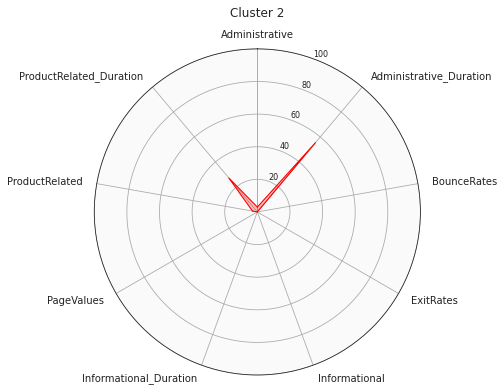

In [236]:
# Each attribute we'll plot in the radar chart.
labels = ['Administrative', 'Administrative_Duration',	'BounceRates',	'ExitRates',
              'Informational','Informational_Duration','PageValues','ProductRelated','ProductRelated_Duration']

# Let's look at the 1970 Chevy Impala and plot it.
values = table.loc[2].tolist()

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
values += values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw the outline of our data.
ax.plot(angles, values, color='red', linewidth=1)
# Fill it in.
ax.fill(angles, values, color='red', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 100)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Lastly, give the chart a title and give it some
# padding above the "Acceleration" label.
ax.set_title('Cluster 2', y=1.08)